# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

# MNIST Data Download and Processing

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [4]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# Filtering the Data (0,1,4)

In [5]:
# train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2) | (Y_train == 3) | (Y_train == 4))
# test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2) | (Y_test == 3) | (Y_test == 4))
train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 4))
test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 4))

In [6]:
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

In [7]:
# # Create a TensorFlow dataset
# dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))

# # Define a function to resize the images
# def resize_image(image, target_size=(10, 10)):
#     resized_image = tf.image.resize(image, target_size)
#     return resized_image

# # Map the resize_image function to the dataset
# target_size = [10, 10]
# resized_dataset = dataset.map(lambda x, y: (resize_image(tf.expand_dims(x, axis=-1), target_size), y))

# # (Optional) Normalize the pixel values
# # resized_dataset = resized_dataset.map(lambda x, y: (x / 255.0, y))

# # Iterate through the resized dataset
# for image, label in resized_dataset.take(1):# Take the first 5 samples as an example
#     print("Resized Image Shape:", image.shape)
#     print("Label:", label.numpy())
#     plt.imshow(image)


In [8]:
# dataset_test = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

# # Define a function to resize the images
# def resize_image(image, target_size=(10, 10)):
#     resized_image = tf.image.resize(image, target_size)
#     return resized_image

# # Map the resize_image function to the dataset
# target_size = [10, 10]
# resized_dataset_test = dataset_test.map(lambda x, y: (resize_image(tf.expand_dims(x, axis=-1), target_size), y))

# # (Optional) Normalize the pixel values
# # resized_dataset = resized_dataset.map(lambda x, y: (x / 255.0, y))

# # Iterate through the resized dataset
# for image, label in resized_dataset.take(1):# Take the first 5 samples as an example
#     print("Resized Image Shape:", image.shape)
#     print("Label:", label.numpy())
#     plt.imshow(image)

In [9]:
# X_train = []
# Y_train = []
# for image , label in resized_dataset:
#     X_train.append(image)
#     Y_train.append(label.numpy())

# X_train = np.stack(X_train,axis = 0)
# Y_train = np.stack(Y_train,axis = 0)

In [10]:
# X_test = []
# Y_test = []
# for image , label in resized_dataset:
#     X_test.append(image)
#     Y_test.append(label.numpy())

# X_test = np.stack(X_test,axis = 0)
# Y_test = np.stack(Y_test,axis = 0)

# Show Random Images

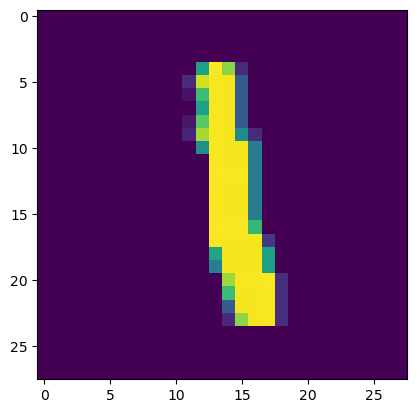

In [11]:
plt.imshow(X_train[3])

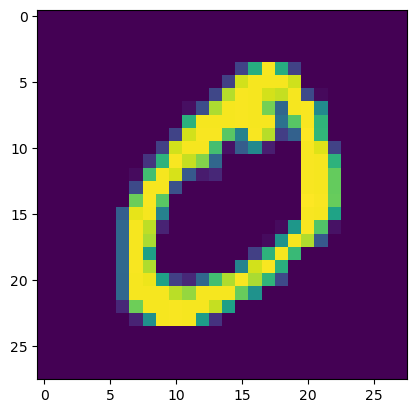

In [12]:
plt.imshow(X_train[0])

# MNIST Data Information

In [13]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (18507, 28, 28)
Y_train: (18507,)
X_test:  (3097, 28, 28)
Y_test:  (3097,)


# Normalize the Images

In [14]:
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
X_train[1].shape

(28, 28)

# Flattening the Input

In [16]:
def flattenInput(mat):
        mat = mat.flatten()
        mat = mat.reshape(mat.shape[0],1)
        return mat

# Weight Initialization(Random,Normalized)

In [17]:
def weightInitialization(rows , cols, type = "random"):
    if(type == "random"):
        initialWeights = np.random.random(size = (rows,cols))
    else:
        initialWeights = np.random.normal(size = (rows,cols))
    
    initialWeights = initialWeights.reshape(rows,cols)
    return initialWeights

In [60]:
#weights = weightInitialization(784,20,"random")
weights = weightInitialization(784,10,"normalize")

In [61]:
weights.shape

(784, 10)

# Manipulating the Array

In [62]:
def manipulatingTheArray(mat):
    mat = flattenInput(mat)
    
    for index in range(mat.shape[0]):    
        if mat[index] < 0.2:
            mat[index] = -1
    return mat

# Thresholding Weight

* function   : Thesholding 
* prameters  : matrix
* return     : updated matrix
* Description : check if the value in the matrix is above or below certain thresholds.
                (e.g for the below function- if greater than 0.8 , values should remain same
                                             if between 0.5 and 0.8 , value equals 0.5
                                             if between 0.1 and 0.5 , value equals 0.3
                                             else value equals 0.1)
* 4.Points to remember : The thresholding values are hard coded. To make the code more suitable for different values ,   we can change the function parameters and pass thresholding values as well to the funtion.|

In [63]:
def Thresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.8:
            out[0][item] = 0.8
        elif out[0][item] >= 0.5 and out[0][item] < 0.8:
            out[0][item] = 0.5
        elif out[0][item] > 0.1 and out[0][item] < 0.5:
            out[0][item] = 0.3
        else:
            out[0][item] = 0.1
    return out

# Activation Value Thresholding

* This is similiar to the above funtion (thresholding function)
* Parameters  : Matrix
* Description : same as the Thresholding function. (Thresholding values are different).

In [64]:
def ActThresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.9:
            out[0][item] = 0.9
#         else:
#             out[0][item] = 0.1
    return out

# Threshold Check

* function    : crossThreshold
* parameters  : matrix
* return      : matrix
* Description : checks if the value in the matrix is greater than a certain threshold , set the value as 0 if not then do the leaking

In [65]:
def crossThreshold(out,thresholdVal,leakingVal):
   
    for item in range(out.shape[1]):
        if out[0][item] >= 0.09:
            out[0][item] = 0.09
        elif out[0][item] >=0.09 and out[0][item] <= 0.02:
            output[0][item] = 0.07
        else:
            out[0][item] = out[0][item] - leakingVal

    return out

# Weight Threshold (Future Reference)
* function    : weightThreshold
* parameters  : matrix
* return      : matrix
* Description : if the values in the matrix are less 0 , set it at 0

In [66]:
def weightThreshold(weight):
    for item in range(weight.shape[1]):
        if weight[0][item] <= 0:
            weight[0][item] = 0
    
    return weight
            

In [67]:
def weightThresholdAfterTraining(weight):
    for x in range(weight.shape[0]):
        for y in range(weight.shape[1]):
            if weight[x][y] <= 0:
                weight[x][y] = 0
    
    return weight

# Print Results
* function : printResults
* parameters : input Image matrix , weight Matrix (final)
* return : result
* Description : It does matrix dot product of the flattened image and the final weight matrix

In [68]:
def printResults(inputImage,finalWeight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        result.append(np.dot(item.T,finalWeight))
    return result

# Flattens the test Image

In [69]:
testFlatten = []

for image_ in X_test:
        image_ = flattenInput(image_)
        testFlatten.append(image_)




# Weight Update

In [28]:
def weightUpateContainingMemoryElement(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = [] # empty list
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out = np.array(0)
    alpha =1e-4
    beta = 1e-5
    thresholdVal = 0.7
    leakingVal = 0.1
    outArray = []
    for epoch_ in range(epoch):
        print(epoch_)
        outEpoch = []
        for input_ in flattenImage:
                out = alpha * np.dot(input_.T , weight) + out 
                #out = ActThresholding(out)
                inputM = manipulatingTheArray(input_)
                weight = weight + beta * np.dot(inputM,out)
                #weight = weightThreshold(weight)
                out = crossThreshold(out,thresholdVal,leakingVal)
                outEpoch.append(out)
        out = np.array(0)
        outArray.append(outEpoch)
    return weight,outArray

In [29]:
# Notes
# Print the values of out and set the threshold values accordingly
# Check with different values manipulating Array, weightthreshold,crossthreshold


In [30]:
finalWeight,outArray = weightUpateContainingMemoryElement(3,1,X_train,weights)

0
1
2


In [31]:
finalWeight[0]

array([70.28844144, 70.58167083, 69.90616208, 70.596764  , 70.48856238,
       70.78918369, 69.82888253, 70.1420214 , 69.88023141, 70.01367861,
       70.15448921, 69.89936437, 69.87273539, 70.144813  , 70.62228807,
       70.50376525, 70.45141763, 69.98771559, 70.22987764, 69.60563916])

In [32]:
finalWeight = weightThresholdAfterTraining(finalWeight)

In [33]:
outArray[0]

[array([[-0.09370483, -0.09439912, -0.09371216, -0.09412142, -0.09451578,
         -0.0943833 , -0.09411559, -0.09392029, -0.09410094, -0.09434939,
         -0.09379112, -0.09352708, -0.09439111, -0.09389299, -0.09397335,
         -0.09376028, -0.0937281 , -0.09396225, -0.09390465, -0.09350847]]),
 array([[-0.18984739, -0.19064993, -0.18997753, -0.19014767, -0.19075226,
         -0.19090911, -0.19041681, -0.18996756, -0.19045431, -0.19064027,
         -0.1898173 , -0.18994666, -0.19051846, -0.19032183, -0.19050693,
         -0.19000689, -0.18973366, -0.19011357, -0.19027094, -0.18941087]]),
 array([[-0.28673839, -0.28706031, -0.28655414, -0.28713828, -0.28762059,
         -0.28758941, -0.28728945, -0.28671861, -0.28685982, -0.28745266,
         -0.28624423, -0.28633609, -0.28678227, -0.28695926, -0.28755951,
         -0.28666637, -0.28660584, -0.28687856, -0.28726156, -0.28614534]]),
 array([[-0.38336429, -0.38335218, -0.3830141 , -0.38382249, -0.38425458,
         -0.38468118, -0.3839

In [34]:
outArray[1]

[array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09

In [35]:
outArray[2]

[array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
         0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]]),
 array([[0.09

In [36]:
# Make sure the weights positve greater than 0
# (-1,1) reference 
# weight range (0,1) ---> 1st check and try to make sure it stays between these values.
# if it does not happen , then go for (-1,1) before that check the thresholding functions and out

# try getting above 95 percentage.

# if not possible , try adding hidden layers and check

In [37]:
results=printResults(X_train,finalWeight)

In [38]:
results

[array([[2399.59132573, 2393.0340783 , 2398.90105577, 2400.34211613,
         2398.28581044, 2400.61851826, 2399.98657461, 2394.80813349,
         2391.17943714, 2395.87062458, 2399.00132846, 2399.94065537,
         2394.53201605, 2396.33429479, 2404.67581475, 2394.92181442,
         2400.36204536, 2395.69883331, 2404.17438259, 2398.12086915]]),
 array([[2792.87094695, 2792.80934316, 2792.32058652, 2798.42058303,
         2799.38588449, 2798.89637447, 2797.11562374, 2792.88124342,
         2787.67262573, 2793.65252387, 2794.90591346, 2787.48394176,
         2794.34405412, 2789.52560094, 2797.07404923, 2788.13309879,
         2794.02086313, 2792.47886313, 2799.17617345, 2792.76411855]]),
 array([[1093.1848584 , 1096.47481843, 1095.27385508, 1093.56389379,
         1095.78824568, 1098.89047349, 1095.47147823, 1093.89128174,
         1095.98887874, 1093.20474133, 1098.33356731, 1095.5857468 ,
         1098.36446052, 1094.09347878, 1093.46484021, 1093.50764906,
         1092.3182586 , 1093

* calculating average value from result matrix.

In [39]:
resultsAvg = []
for item in range(len(results)):
    resultsAvg.append(np.median(results[item]))

In [40]:
np.unique(Y_train)

array([0, 1, 4], dtype=uint8)

* Storing the indices of the image in y_train corresponding to 0,1,2,3,4

In [41]:
res0 = []
res1 = []
res4 = []

index = 0

for item in Y_train: 
    if item == 0:
        res0.append(index)
    elif item == 1:
        res1.append(index)
    elif item == 4:
        res4.append(index)
    index += 1
        

# Checking the values of Zeros

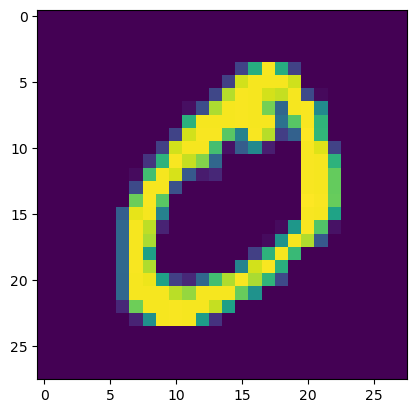

In [42]:
plt.imshow(X_train[res0[0]])

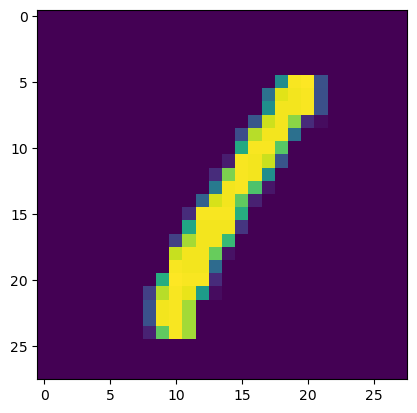

In [43]:
plt.imshow(X_train[res1[0]])

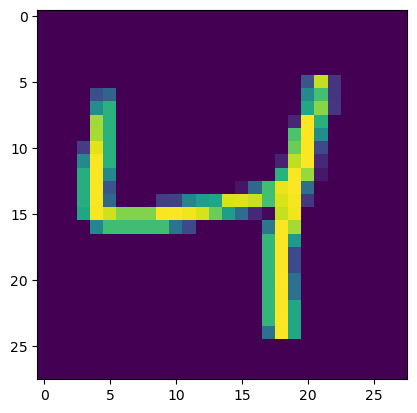

In [44]:
plt.imshow(X_train[res4[0]])

# Storing the index of the images

* function : storingIndexes
* parameters : passing list containing indices of the image 0,1,2,3,4
* return : values corresponding to those indices(image)

In [45]:

def storingIndexes(res0,res1,res4):
    result0 = []
    result1 = []
    result4 = []
    
    for index in res0:
        result0.append(resultsAvg[index])
    
    for index in res1:
        result1.append(resultsAvg[index])
        
    for index in res4:
        result4.append(resultsAvg[index])
    
    return result0,result1,result4
        

In [46]:
result0 , result1 , result4 =storingIndexes(res0,res1,res4)

In [47]:
def plotResults(res):
    plt.plot(res)
    plt.ylim(0,1)
    plt.show()

In [48]:
#plotResults(result0)

(array([  3.,   5.,  25.,  49.,  87., 114., 166., 206., 219., 235., 249.,
        335., 339., 320., 303., 353., 310., 310., 332., 290., 238., 244.,
        210., 187., 162., 131., 116.,  90.,  59.,  57.,  44.,  37.,  24.,
         17.,  20.,  15.,   9.,   1.,   3.,   3.,   1.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   1.]),
 array([ 802.12769874,  962.58169415, 1123.03568956, 1283.48968497,
        1443.94368038, 1604.39767579, 1764.85167119, 1925.3056666 ,
        2085.75966201, 2246.21365742, 2406.66765283, 2567.12164824,
        2727.57564365, 2888.02963905, 3048.48363446, 3208.93762987,
        3369.39162528, 3529.84562069, 3690.2996161 , 3850.7536115 ,
        4011.20760691, 4171.66160232, 4332.11559773, 4492.56959314,
        4653.02358855, 4813.47758396, 4973.93157936, 5134.38557477,
        5294.83957018, 5455.29356559, 5615.747561  , 5776.20155641,
        5936.65555181, 6097.10954722, 6257.56354263, 6418.01753804,
        6578.47153345, 6738.92552886, 6899.379

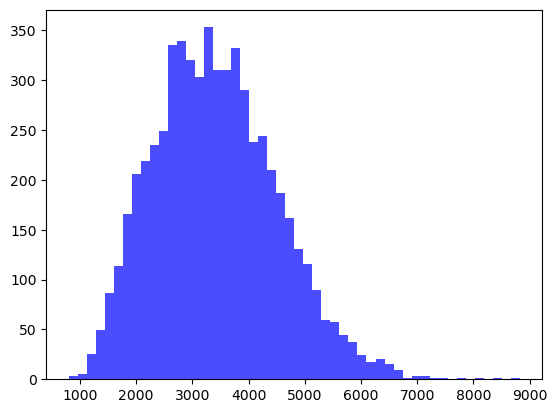

In [49]:
plt.hist(result0, bins=50, color='blue', alpha=0.7) 

In [50]:
#plotResults(result1)

(array([ 47., 248., 522., 645., 719., 687., 573., 512., 411., 417., 290.,
        285., 227., 190., 150., 137., 117.,  90.,  67.,  88.,  37.,  48.,
         44.,  30.,  20.,  20.,  22.,  22.,   9.,   9.,  12.,  11.,   8.,
          2.,   4.,   3.,   4.,   4.,   2.,   1.,   1.,   1.,   2.,   0.,
          1.,   0.,   0.,   0.,   1.,   2.]),
 array([ 123.85837402,  199.79246031,  275.72654659,  351.66063288,
         427.59471916,  503.52880545,  579.46289173,  655.39697802,
         731.3310643 ,  807.26515059,  883.19923688,  959.13332316,
        1035.06740945, 1111.00149573, 1186.93558202, 1262.8696683 ,
        1338.80375459, 1414.73784087, 1490.67192716, 1566.60601344,
        1642.54009973, 1718.47418601, 1794.4082723 , 1870.34235858,
        1946.27644487, 2022.21053115, 2098.14461744, 2174.07870372,
        2250.01279001, 2325.94687629, 2401.88096258, 2477.81504886,
        2553.74913515, 2629.68322144, 2705.61730772, 2781.55139401,
        2857.48548029, 2933.41956658, 3009.353

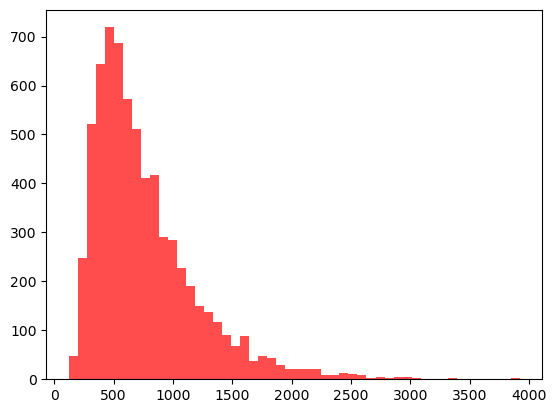

In [51]:
plt.hist(result1, bins=50, color='red', alpha=0.7) 

In [52]:
#plotResults(result4)

(array([  3.,  10.,  55., 147., 216., 280., 343., 397., 403., 457., 399.,
        406., 385., 346., 303., 265., 238., 191., 173., 137., 114.,  82.,
         86.,  59.,  57.,  42.,  47.,  43.,  28.,  28.,  19.,  17.,  11.,
         10.,   8.,  13.,   4.,   2.,   3.,   1.,   4.,   0.,   4.,   1.,
          0.,   3.,   1.,   0.,   0.,   1.]),
 array([ 354.19375602,  489.575844  ,  624.95793197,  760.34001994,
         895.72210791, 1031.10419589, 1166.48628386, 1301.86837183,
        1437.2504598 , 1572.63254778, 1708.01463575, 1843.39672372,
        1978.77881169, 2114.16089967, 2249.54298764, 2384.92507561,
        2520.30716359, 2655.68925156, 2791.07133953, 2926.4534275 ,
        3061.83551548, 3197.21760345, 3332.59969142, 3467.98177939,
        3603.36386737, 3738.74595534, 3874.12804331, 4009.51013129,
        4144.89221926, 4280.27430723, 4415.6563952 , 4551.03848318,
        4686.42057115, 4821.80265912, 4957.18474709, 5092.56683507,
        5227.94892304, 5363.33101101, 5498.713

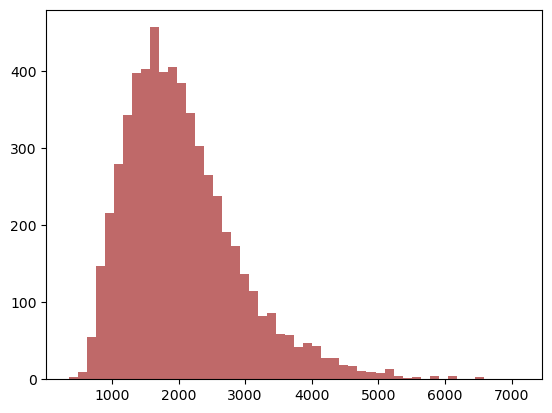

In [53]:
plt.hist(result4, bins=50, color='brown', alpha=0.7) 

In [54]:
def calculateResult(data,finalWeight):
        predict = []
        for item in data:
            item = flattenInput(item)
            res = np.dot(item.T,finalWeight)
            res = np.median(res)
            predict.append(res)
        return predict

In [55]:
from scipy.stats import norm

In [56]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    accuracy = 0
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
            accuracy = correct_predictions/len(y_true)
    return accuracy*100

In [57]:
# Calculate the probability densities under each distribution
result = calculateResult(X_test,finalWeight)
prediction = []
for value in result:
    pdf1 = norm.pdf(value, loc=np.mean(result0), scale=np.std(result0))
    pdf2 = norm.pdf(value, loc=np.mean(result1), scale=np.std(result1))
    pdf3 = norm.pdf(value, loc=np.mean(result4), scale=np.std(result4))

# Determine which distribution the value most likely belongs to
    if pdf1 > pdf2 and pdf1 > pdf3:
        prediction.append(0)
    elif pdf2 > pdf1 and pdf2 > pdf3:
        prediction.append(1)
    else:
        prediction.append(4)

In [58]:
accuracy = compute_accuracy(Y_test,prediction)

In [59]:

accuracy

73.3613174039393

In [450]:
#*************************************************
# random ---> median ---> 69.8 ----> 3
# normalize ----> median ---> 44.04 ---->3
# random ---> mean ---> 69.7 -----> 3
# normalize ---> median ---> 63.254 --->10
# random -----> median ----> 68.2 ----> 10

# Above observation for output neuon equals 20
#*************************************************
# random -----> median ----> 67.06 ----> 10
# random -----> mean -----> 65.87 ---->10
# normalize ---> mean -----> 55.92 ----> 10
# normalize --->median -----> 48.01 ---->10

# Above observation for output neuon equals 3
#*************************************************
# normalize ----> median -----> 76.5 ----> 10 --> 1st time
# normalize ----> median -----> 71.68 ----> 10 --> 2nd Time
#*************************************************
# normalize ----> median ----->69.03 ----> 10 ----->weightThresholding after epoch ---> 0.9(Threshold),0.1(Leaking)
# normalize ----> median ----->68.4 ----> 10 ----->weightThresholding after epoch ---> 0.9(Threshold),0.1(Leaking), removed out threshold

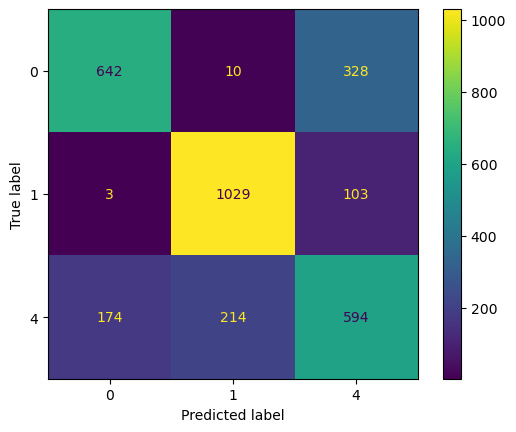

In [227]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_test,prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1 ,4])

cm_display.plot()
plt.show()

In [228]:
np.min(result0)

820.6168923161749

In [229]:
np.max(result0)

9069.743417341037

* Returns min and max value in a list

In [230]:
def MaxMinResult(res):
    return np.min(res) , np.max(res)

In [233]:
min0 , max0 = MaxMinResult(result0)
min1 , max1 = MaxMinResult(result1)
min4 , max4 = MaxMinResult(result4)

In [234]:
print(min0)
print(max0)

820.6168923161749
9069.743417341037


In [235]:
print(min1)
print(max1)

124.88702314462651
4035.114572155578


In [236]:
print(min4)
print(max4)

358.7676893895287
7342.2584121915625


In [237]:
max_value = np.max(result0)
index = result0.index(max_value)
print(index)


4077


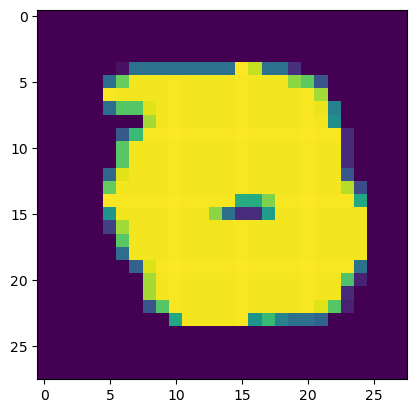

In [238]:
plt.imshow(X_train[res0[4077]])

In [239]:
max_value = np.min(result0)
index = result0.index(max_value)
print(index)


3707


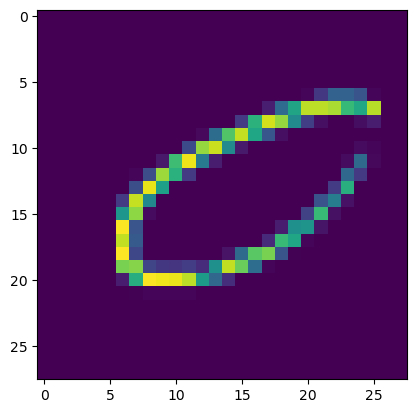

In [240]:
plt.imshow(X_train[res0[3525]])

In [241]:
np.mean(np.dot(testFlatten[0].T,finalWeight))

300.2028669737775

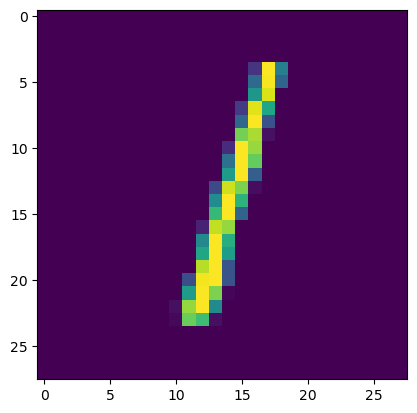

In [242]:
plt.imshow(X_test[0])

In [243]:
np.mean(np.dot(testFlatten[3].T,finalWeight))

420.13239328502254

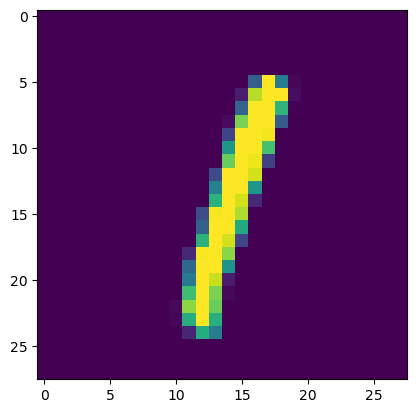

In [244]:
plt.imshow(X_test[3])

# Problem

1. Proper Encoding of the MNIST Data is required
2. Check the algorithm for previous data
    - The weight values are increasing
3. Thresholding on weights
4. If weights are increasing then the output will be increasing , we have to work on the the weight clipping.
5. Epochs 10
6. Digits 0-5 (20 output neurons)

In [245]:
def weightUpdate(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                input_ = manipulatingTheArray(input_)
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    #manipulatedinput = manipulatingTheArray(input_)
                    weight = weight + np.dot(input_, out)
                print(out)
            

In [246]:
weightUpdate(1,1,X_train,weights)

NameError: name 'thresholding' is not defined

# Experimenting with the Weight Update Function 

1. Without Thresholding

In [77]:
def weightUpdateNoThresholding(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    mInput = manipulatingTheArray(input_)
                    weight = weight + np.dot(mInput, out)
                print(out)
    
    #return weight

In [80]:
#weightUpdateNoThresholding(1,10,X_train,weights)

2. No Input Manipulation

In [81]:
def weightUpdateNoInputManipulation(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [83]:
finalWeights = weightUpdateNoInputManipulation(1,10,X_train,weights)

In [85]:
printResults(X_train,finalWeights)

[array([[9952981.9776312 , 9952983.78771774, 9952980.22546172,
         9952984.17954997, 9952979.62129831, 9952983.39618329,
         9952984.12277677, 9952978.30823085, 9952977.73184416,
         9952980.29404787, 9952981.81693666, 9952978.96837344,
         9952982.51001832, 9952984.30400523, 9952986.40933317,
         9952980.39956972, 9952981.34806903, 9952978.70548629,
         9952983.84226781, 9952980.82762274]]),
 array([[4411007.2184424 , 4411010.05153546, 4411008.07675292,
         4411007.48091497, 4411005.18366287, 4411007.69902311,
         4411008.45580176, 4411005.91641389, 4411009.47492531,
         4411012.58481127, 4411007.2804175 , 4411008.07541623,
         4411008.01839292, 4411010.98324115, 4411010.77982822,
         4411009.52036677, 4411013.13197226, 4411008.80886294,
         4411007.73641599, 4411004.83176408]]),
 array([[6388741.87790482, 6388748.81913613, 6388745.38822244,
         6388746.8537067 , 6388741.0350559 , 6388747.00410496,
         6388742.58585

3. Do combined Iteration for every image

In [86]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [88]:
finalWeights = weightUpdateCombinedIterationForEveryImage(1,100,X_train,weights)

In [90]:
printResults(X_train,finalWeights)

[array([[99529267.36481458, 99529269.17490125, 99529265.61264522,
         99529269.56673346, 99529265.00848174, 99529268.78336686,
         99529269.50996026, 99529263.69541438, 99529263.11902767,
         99529265.68123133, 99529267.2041201 , 99529264.35555698,
         99529267.89720179, 99529269.69118871, 99529271.79651667,
         99529265.7867532 , 99529266.73525254, 99529264.09266976,
         99529269.22945133, 99529266.21480618]]),
 array([[44109744.56282634, 44109747.39591942, 44109745.4211369 ,
         44109744.82529893, 44109742.52804684, 44109745.04340708,
         44109745.80018574, 44109743.26079787, 44109746.81930929,
         44109749.92919523, 44109744.62480146, 44109745.41980021,
         44109745.36277688, 44109748.3276251 , 44109748.12421215,
         44109746.86475074, 44109750.4763562 , 44109746.15324692,
         44109745.08079994, 44109742.17614804]]),
 array([[63887140.69885273, 63887147.64008407, 63887144.20917038,
         63887145.67465465, 63887139.85600

4. Changing the input to 0 to -1

In [91]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    input_ = manipulatingTheArray(input_)
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [92]:
finalWeight = weightUpdateCombinedIterationForEveryImage(3,10,X_train,weights)

In [62]:
for item in inputImage:
    item = flattenInput(item)
    item = manipulatingTheArray(item)
    print(np.dot(item.T,finalWeight))

[[-144.11405281 -136.28787408 -142.12877323 -141.81974185]]
[[221.36048886 220.38450421 221.04038429 221.29584165]]
[[304.967655   293.81240137 304.12401618 303.73500904]]
[[250.65550314 240.63892014 251.23764588 250.69424831]]


In [57]:
finalWeight

array([[ 69.39000612,  68.04254974,  69.43624434,  69.21410972],
       [ 27.32086988,  27.73503806,  27.14569411,  27.62237861],
       [ 69.59175721,  67.63236573,  69.84716618,  69.13499989],
       [-26.91268329, -26.00519731, -26.88039291, -26.61352704],
       [ 27.07747724,  27.15349475,  27.58290186,  27.71552529],
       [ 21.88294213,  19.82698269,  21.19890101,  21.59518935],
       [-26.19324792, -25.02202828, -26.97153446, -26.72172794],
       [-20.80487026, -19.01843236, -20.95428235, -20.61819169],
       [ 69.94875543,  67.68330195,  69.2727027 ,  69.93041008]])